### <img src='./fig/vertical_COMILLAS_COLOR.jpg' style= 'width:70mm'>

<h1 style='font-family: Optima;color:#ecac00'>
Máster en Big Data. Tecnología y Analítica Avanzada (MBD).
<a class="tocSkip">
</h1>

<h1 style='font-family: Optima;color:#ecac00'>
Fundamentos Matemáticos del Análisis de Datos (FMAD). 2022-2023.
<a class="tocSkip">
</h1>

<h1 style='font-family: Optima;color:#ecac00'>
03 Basic Probability
<a class="tocSkip">    
</h1>  

## <span style='background:yellow; color:red'> Remember:</span>

+ Navigate to your `fmad2223` folder in the console  
+ Execute `git pull origin main` to update the code
+ **Do not modify the files in that folder**, copy them elsewhere

In [2]:
# Standard Data Science Libraries Import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as scp

# Populations and Samples

+ The main goal of Statistics is to obtain reliable and useful information about a **population** of interest using **samples** from that population. The term population is used here in a broad sense to refer to any collection of individual entities, not just living creatures. A population can be the set of vehicles with license plates from year 2015, the buying orders received by a company a given month or the hummingbirds that visit a bird feeder during a certain week somewhere in Costa Rica.  

+ Trying to get all the information of interest from all the individuals in a population is often impossible or pointless: too difficult, too expensive, too time consuming or in many cases, too harmful for the individuals in the population if the sampling process causes some degree of damage. That is where Statistics comes into play. Can we use some samples from the population to *infer* or *predict* what we want to know? In that sense a related question is: is the sample a good representation of the population?

+ **Inference** is the part of Statistics dealing with those questions, making them formal and providing answers with a mathematically sound basis.

![](fig/011-inferencePopulationSample.png)

## Simple Random Samples with Python

+ In the study of a population we are usually interested in certain properties or characteristics of the individuals, that may be different from one individual to another. These properties are the *variables of interest to us*. When sampling a population we get the values of those variables in a sample of some individuals from that population. 

+ In order for the sampling process to provide us with a representative sample, we often take what is called a **simple random sample**. That is, we choose individuals from the population at random so that:
    + All individuals in the population are *equally likely* to be chosen for the sample.
    + We sample with *replacement*. That is, an individual can be chosen twice for the same sample. 

+ Let us see a very simple example, using synthetic data. In the following code we create a `Population` data set of `N = 158000` individuals. The example is inspired by the number of passengers at the Madrid airport some days and the variable `Ages` represents the (entirely fictitious) ages of those passengers. This example is unrealistic in that we have the whole set of ages for each and every passenger. The blue dashed line represents the *population* age. In this case we can ask Python to tell us the value, but where would be the fun in doing that? Instead, let us try to come up with a good guess of that mean.

   Ages
0    62
1    52
2    29
3     7
4    31
5    13
6    31
7    15
8    30
9    17


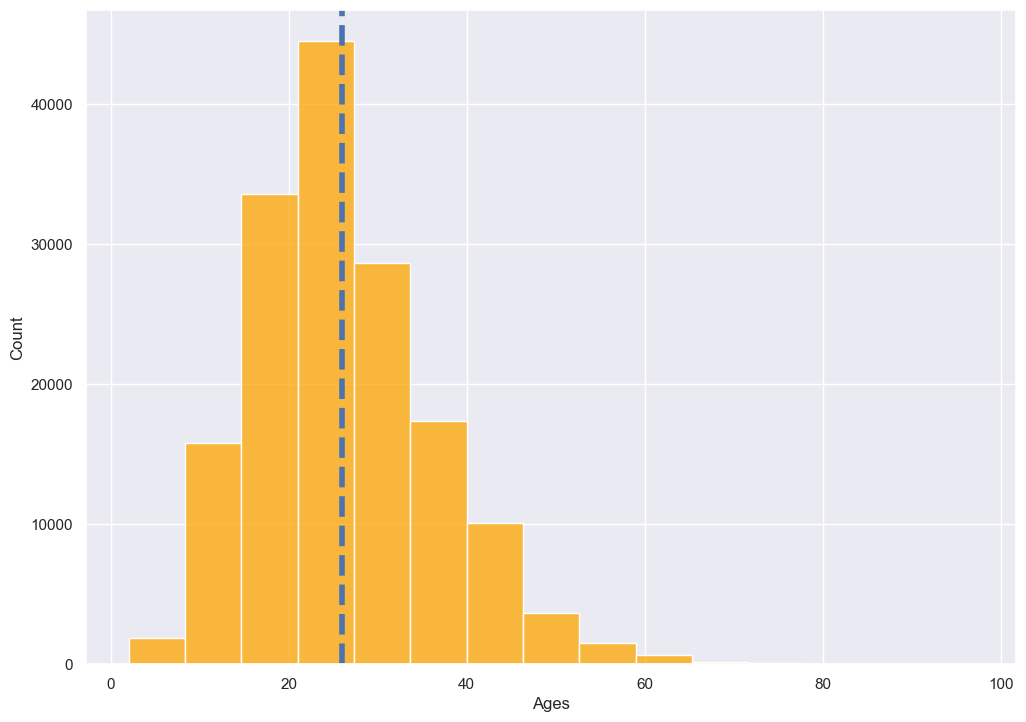

In [7]:
sns.set(rc={'figure.figsize':(12, 8.5)})

rng = np.random.default_rng(2022) # seed for reproducibility

N = 158000
Ages = np.rint(2 * rng.chisquare(df = 13, size = N)).astype(int)
Population = pd.DataFrame({'Ages':Ages})

print(Population.head(10))

sns.histplot(data = Population, x = 'Ages', bins=15, color = "orange")
# Para pintar la media de la población.
getPlot = plt.axvline(x = Population.Ages.mean(), linewidth = 4, linestyle='--')


+ Guesing the population mean is just the type of question that we expect Statistics to answer. So we will take random samples from the population in order to make our guess. Let us begin by taking a sample of 20 individuals ages.

In [8]:
n = 20 # sample size

sample = Population.sample(n)

print(sample) # The index reflects the row lines in the original data set

print("\n" * 2, "Sample mean = ", sample.mean())

        Ages
97882     15
137207    26
6141      26
39844     22
3799      27
89275     12
50357     20
59996     31
124631    29
32135     26
142765    14
94479     22
15394     25
130343    28
107413    34
60285     22
154081    18
47263     32
47460     18
125489    14


 Sample mean =  Ages    23.05
dtype: float64


+ Execute the above cell a few times. Every time you will get a different sample and a new sample mean:  

$$\bar x = \dfrac{x_1 + x_2 +\cdots + x_{20}}{20}$$

+ How different can these sample means be from one another and from the population mean? How *bad* can a sample be? Recall that we are sampling with replacement. Therefore, since there is a passenger with `age = 2` the following sample is a perfeclty legit sample:

$$x_1 = 2,\, x_2 = 2,\,  \ldots \, , x_{20} = 2$$

+ This sample would make us guess that the population sample is 2, which is way off from the true value (look at the histogram). In that sense this is a very, very bad sample (as bad as they get).   

+ But remember, *we are taking random samples (with replacement)* How probable is it that we get this particularly bad sample **at random**?

+ Which leads us to one of the more crucial steps in understanding the inner workings of Statistics. To answer the question at the end of the last paragraph we need to answer this two questions:
    + how many different samples exist?
    + how is the *sample mean* distributed over those samples? In other words, how many *good* and *bad* samples exist when it comes to guessing the mean of the population?
    
  Let us begin with the first question. The number of different samples is this unconceivably large number:
  
  $$158000^{20} \approx 9.4003005\times 10^{103}$$ 
  
  To put this in pespective the number of stars in the universe is estimated to be less than $10^{40}$. 

+ Now let us consider the question about the **distribution of the sample mean** in that huge sample space. There are too many samples in this example to check one by one the mean of every sample and decide if they are good or bad samples (meaning how close they are to the true population sample). But we can look at a large number of samples (a big *sample of samples*) and look at the distribution of the sample mean.  

+ We already did this in an exercise Session 02 (we told you then it was a very important exercise), so you want to take a look at that exercise to recall what happened there. The difference between both situations is that in Session 02 we were sampling from a population where all the values had the same probability. Here our starting point is the population described by the histogram above, where obviously not all values are equally likely.

+ The code to analyze that *sample of samples* is this:

In [21]:
n = 150 # the common size to all samples

n_samples = 10000 # we take a large number of samples with replacement, each of size 20

In [22]:
#%%timeit
sample_means = pd.DataFrame([Population.sample(n, replace=True).mean() for item in range(n_samples)], 
                            columns=['Ages'])

+ Now let us look at the first sample means:

In [23]:
sample_means.head(10)

,Ages
0,26.986667
1,27.673333
2,27.106667
3,26.306667
4,26.540000
5,25.726667
6,26.626667
7,24.813333
8,26.053333
9,25.760000


+ To understand their distribution and answer the question about the proportion of good and bad samples we use a density plot. And to get a deeper insight we also plot the density curve for the original population (blue for the samples, orange for the population): 

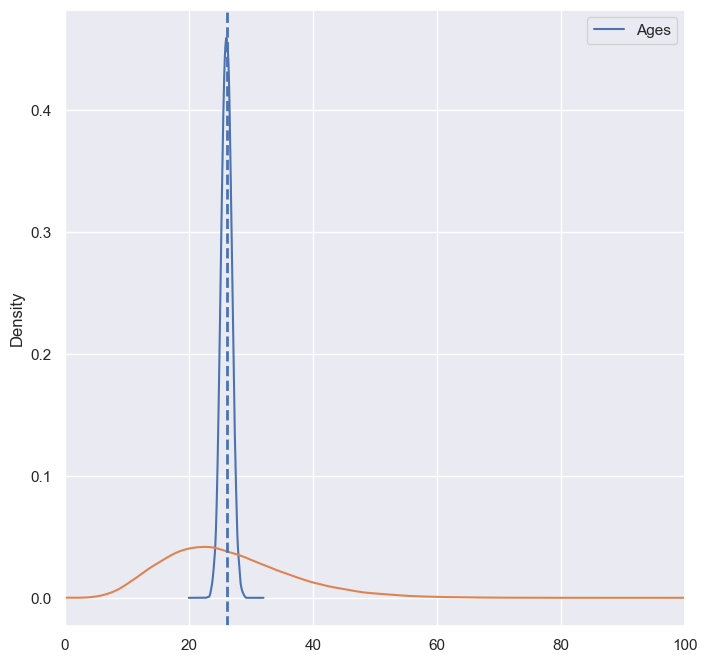

In [24]:
sns.set(rc={'figure.figsize':(8, 8)})
sample_means.plot.density()# Curva azul, imprimimos la muestra que hemos tomado, al tomarla de la forma que hemos hecho arriba, está cerca de la media.
Population.Ages.plot.density()# Curva naranja, imprimimos la poblacion completa
plt.axvline(x = Population.Ages.mean(), linewidth = 2, linestyle='--')
getPlot = plt.xlim((0, 100))
# Con las medias muestrales, siempre aparece la curva normal.

+ **Exercise:** rerun the above cells changing the sample size $n$ and see how it affects the results. Try e.g. with larger sample sizes, such as $n = 150$ and with small samples for $n = 10$.
    + **Resultado**

        + Con 10 aparece una curva más amplia.

        + Con 150 aparece una curva mucho más cerca de la media, prácticamente una recta

+ The above graphic is possibly **the most important graph in the whole course**. Note these three things:

    + The *mean of the sample means* is equal to the population mean. Make sure you understand this!
    + There are very few *really bad samples*. The height of the blue curve is almost equal to zero if you move away from its maximum in either direction. In particular, the probability of randomly choosing and being misled by one of those very bad samples is *extremely* low.
    + The distribution of the sample means is a bell-shaped curve and it is only non zero in a narrow interval centered at the mean. The spread of the sample means is much smaller than the spread of the original population.
    
+ The blue bell-shaped curve contains a very precise and useful answer to our second question about the distribution of the sample means. And the important thing here is that the same kind of bell shaped answer appears for any choice of the initial population. This is the content of the **Central Limit Theorem**, one of the most important results in Statistics. But to make  these ideas precise we need the vocabulary of Probability. 

+ **Exercise:** 
    + Use the following commands to generate a new population:
    ```python
    rng = np.random.default_rng(2022) # seed for reproducibility
    N = 100000
    x = np.concatenate((1.5 * rng.normal(loc = -2, size = N), rng.normal(loc = 0.5, size = N)))
    Population2 = pd.DataFrame({'x':x})
    ```
    + Plot the density curve of this population.
    + Repeat the above steps: take a large number (tens of thousands) of size-20 samples (with replacement) of this population. Compute the sample means for all those samples and use graphs to study the distribution of the sample mean. 

<Figure size 800x800 with 0 Axes>

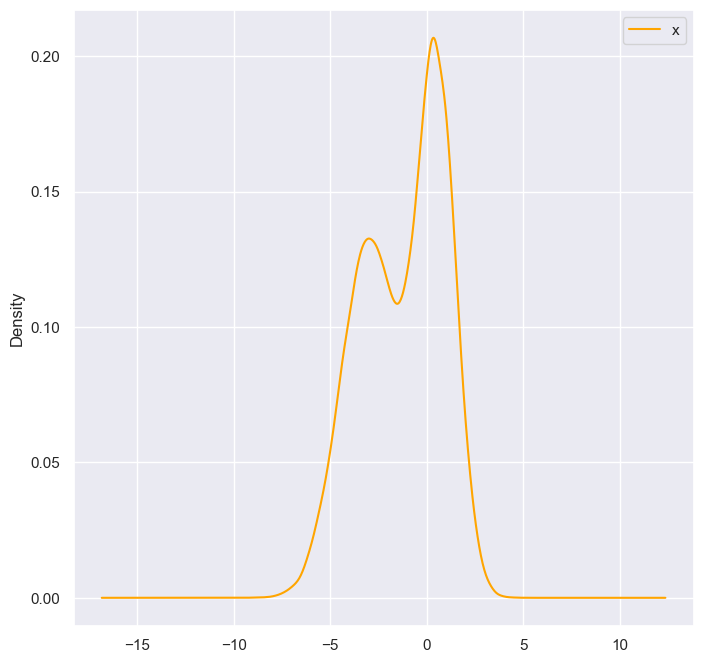

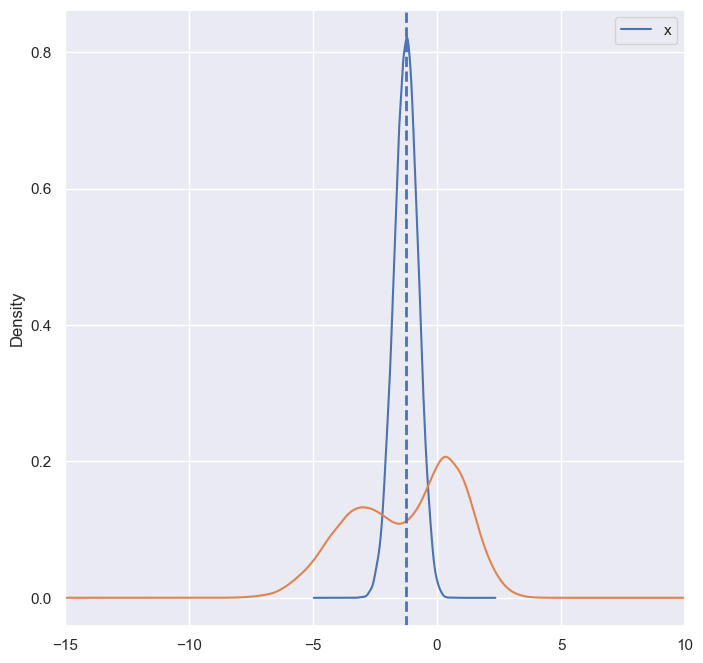

In [4]:
# %load "./exclude/S03-001.py"
# Exercise S03-001

sns.set(rc={'figure.figsize':(8, 8)})

# Create the population
rng = np.random.default_rng(2022) # seed for reproducibility
N = 100000
x = np.concatenate((1.5 * rng.normal(loc = -2, size = N), rng.normal(loc = 0.5, size = N)))
Population2 = pd.DataFrame({'x':x})

# Plot the population density
plot0 = plt.figure(0)
plot0 = Population2.plot.density(color='orange')

# Take a large number of size 20 samples with replacement
n = 20 
n_samples = 20000 # take a large number of samples

# and compute the sample means (in a DataFrame with the mean from each sample)
sample_means = pd.DataFrame([Population2.sample(n, replace=True).mean() for item in range(n_samples)], 
                            columns=['x'])

# Now we plot the density curve for all these sample means.
plot1 = plt.figure(1)
sample_means.plot.density()
Population2.x.plot.density()
plt.axvline(x = Population2.x.mean(), linewidth = 2, linestyle='--')
getPlot = plt.xlim((-15, 10))

# Basic Probability

+ To understand or even state the Central Limit Theorem we need to learn a minimal amount of the language  of Probability Theory. 

+ And the first step as we enter this world of Probability is the realization that our intuition of probabilities is usually quite poor. We will begin using examples from simple gambling games such as cards, dice, etc. because historically this is also the context where Probability was born.

## The problems of the *Chevalier de Méré*

+ [A. Gombaud, Chevalier de Méré](https://en.wikipedia.org/wiki/Antoine_Gombaud) was an amateur mathematician from the 17th century who became interested in understanding gambling and applying Mathematics to it. He himself made no major contributions to solving the problems he raised, but he managed to get the attention of well known mathematicians such as Pascal, Fermat and later Laplace. In particular he got them thinking about the solution of these two famous seminal problems. When playing dice, what is more likely?

  + To get at least one six in four rolls of a single dice or
  + to get at least a double six in 24 rolls of two dice.
  
+ The gamblers of that time reasoned that:

  (a) The probability of rolling a six in a single dice roll is 1/6. Therefore, in four rolls the probability is
  $$\dfrac{1}{6} + \dfrac{1}{6} + \dfrac{1}{6} + \dfrac{1}{6} = \dfrac{4}{6} = \dfrac{2}{3}$$
  (b) The probability of rolling a double six in a two dice roll is 1/36 (because there are 36 diferent results). Therefore, in 24 rolls the probability is
  $$\dfrac{1}{36} + \dfrac{1}{36} + \cdots + \dfrac{1}{36} = \dfrac{24}{36} = \dfrac{2}{3}$$
  
  Thus it would seem that both bets are similarly likely. These kind of reasoning was being used in gambling salons to establish the amount that the gamblers should win or lose in these games. Legend has it that Gombaud kept track of the results of these games for a long time and became aware that the results did not match the above reasoning. The probabilities of winning and losing seemed wrong to him.

+ Instead of having you discover Probability by losing your money at gambling, let us use Python.
![](https://media.giphy.com/media/3ohjUS2N88LGAjLypO/giphy.gif)  

+ **Exercise:** Let $N = 100000$. 

  (a) Simulate $4\cdot N$ results of the first de Méré games and obtain a table of the relative frequencies for win or lose in this game.  
  (b) Do the same for the second de Méré game, but this time simulate $24\cdot N$ results of this game.  
  (c) Compare the relative frequencies of winning in (a) and (b) with our naive estimate of $2/3$.


In [ ]:
# %load "./code/S03-002a.py"
# Exercise S03-002a

# Exercise S03-002a

# Initialize the random seed generator for reproducibility
rng = np.random.default_rng(2022) 

# total number of games
N = 100000

# We generate the N games as a NumPy array of N rows and 4 columns.
# Each row represents a game, each column the roll of a single dice.
game1 = rng.integers(low = 1, high = 7, size = (N, 4))


# These are the first few games
print(game1[0:10, :])
print("-" * 30, "\n")

# Next we check every dice roll to see if we got a six
game1_is_6 = (game1 == 6)
# The first part of the output of this step is
print(game1_is_6[0:10, :])
print("-" * 30, "\n")

# Now we count the number of appearances of six in each row/game
game1_number_of_6 = game1_is_6.sum(axis=1)
# Compare with the previous step to check that the count is ok
print(game1_number_of_6[0:10])
print("-" * 30, "\n")

# And now we can see if the game is win or lose (0 appearances of 6) 
game1_win = game1_number_of_6 > 0 
print(game1_win[0:10])
print("-" * 30, "\n")

# We can finally get the relative frequencies of win and lose at this game
table = np.array(np.unique(game1_win, return_counts=True))
relfreqLose = table[1, 0] / N
relfreqWin = table[1, 1] / N
print("The relative frequency of winning the first game is ", relfreqWin)
print("while 2 / 3 = ", 0.6666, " approx.")

In [1]:
# mi solucion

import numpy as np
import pandas as pd

N = 100000
# Creamos un dataframe con 4 coumnas, cada una correspondiente a una tirada, y numeros aleatorios del 1 al 6
df = pd.DataFrame(np.random.randint(1,7,size=(N, 4)))
print(df.head())
print("----------------------------------------------")
booleandf = (df == 6)
print(booleandf)
print("----------------------------------------------")
booleandf.value_counts()

# Recorremos el dataframe y contamos los 6 que han salido.
#print(df[0].value_counts().sort_index())
#print(df[1].value_counts().sort_index())
#print(df[2].value_counts().sort_index())
#print(df[3].value_counts().sort_index())

# Contar trues que hay en cada columna,dividir los 6 que salgan entre 4 y entre el total



   0  1  2  3
0  5  1  5  4
1  1  5  1  4
2  1  6  3  1
3  4  6  6  3
4  4  6  2  1
----------------------------------------------
           0      1      2      3
0      False  False  False  False
1      False  False  False  False
2      False   True  False  False
3      False   True   True  False
4      False   True  False  False
...      ...    ...    ...    ...
99995  False  False  False  False
99996  False  False  False  False
99997  False  False  False  False
99998  False  False  False  False
99999  False  False  False  False

[100000 rows x 4 columns]
----------------------------------------------


0      1      2      3    
False  False  False  False    48498
True   False  False  False     9691
False  True   False  False     9671
       False  False  True      9581
              True   False     9504
       True   True   False     1967
True   False  True   False     1934
False  True   False  True      1926
True   False  False  True      1888
False  False  True   True      1877
True   True   False  False     1822
False  True   True   True       403
True   True   True   False      397
              False  True       383
       False  True   True       380
       True   True   True        78
dtype: int64

In [ ]:
# %load "./code/S03-002b.py"
# Exercise S03-002b

# Initialize the random seed generator for reproducibility
rng = np.random.default_rng(2022) 

# total number of games
N = 100000

# We generate the 24 * N games as a NumPy array of N rows and 24 columns.
# Each row represents a game, each column the roll of two dice.
# Rolling two dice results are coded from 1 to 36, with 36 is a double 6.
game2 = rng.integers(low = 1, high = 37, size = (N, 24))

# These are the first few games
print(game2[0:10, :])
print("-" * 30, "\n")

# Next we check every dice roll to see if we got a six
game2_is_36 = (game2 == 36)
# The first part of the output of this step is
print(game2_is_36[0:10, :])
print("-" * 30, "\n")

# Now we count the number of appearances of six in each row/game
game2_number_of_36 = game2_is_36.sum(axis=1)
# Compare with the previous step to check that the count is ok
print(game2_number_of_36[0:10])
print("-" * 30, "\n")

# And now we can see if the game is win or lose (0 appearances of 6) 
game2_win = game2_number_of_36 > 0 
print(game2_win[0:10])
print("-" * 30, "\n")

# We can finally get the relative frequencies of win and lose at this game
table = np.array(np.unique(game2_win, return_counts=True))
relfreqLose = table[1, 0] / N
relfreqWin = table[1, 1] / N
print("The relative frequency of winning the second game is ", relfreqWin)
print("while 2 / 3 = ", 0.6666, " approx.")

## The Birthday Paradox

+ This is another experiment that illustrates how bad our probabilistic intuition usually is. If we have a room (a large hall) with 367 or more people in it, then we are certain that there are two people in that room whose birthdays coincide. However if the number of people present is less then the probability of birthdays coincidence decreases. What is the smallest number of people in a room that leads to a coincidence probability bigger than 50%?

+ Let us use Python to answer the question. 

In [7]:
import random
import pandas as pd
import numpy as np
# Numero de personas de la sala
N = 22
# Numero de salas
M = 10

df = pd.DataFrame(np.random.randint(1,3,size=(M, N)))
print(df.shape)
#print(df)
print("________________________________________________________")
#print(df.sort())

print(df.apply(pd.Series.duplicated, axis=0))
df2 = df.apply(pd.Series.duplicated, axis=1).sum()
#print(df.apply(pd.Series.duplicated, axis=1).sum())

#df3 = (df2[df2 > 0])

df3 = df2/df2

#Calculamos la probabilidad
sum(df3.fillna(0)/N)

(1, 22)
________________________________________________________
      0      1      2      3      4      5      6      7      8      9   ...  \
0  False  False  False  False  False  False  False  False  False  False  ...   

      12     13     14     15     16     17     18     19     20     21  
0  False  False  False  False  False  False  False  False  False  False  

[1 rows x 22 columns]


0.9090909090909088

In [5]:
# Solucion del profesor
rng = np.random.default_rng(2022)
N = 100
n = 40

def repeats_exist(a):
    day,count = np.unique(a, return_counts=True)
    return (count.max() > 1)

rooms = rng.integers(low=1, high = 367, size=(N,n))

np.apply_along_axis(repeats_exist, axis=1,arr=rooms)

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True,  True,  True, False, False,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [6]:
sum(df3.fillna(0)/N)

0.20000000000000004

## Laplace's Method 

+ This was historically the first result that made it possible to address the systematic computation of probabilities. But as we will see, its practical application is not always simple and it is also lacking from the theoretical perspective.

+ We need some language to state the rule:

  (a) We will consider a random experiment with $n$ **elementary possible results** (two of them can not simultaneously occur)     $$a_1, a_2, \ldots, a_n$$ 
  which *must occur with the same probability*. That means, in an informal approach, that their relative frequencies are the same when the experiment is conducted a very large number of times. For example, when throwing a honest dice, the set of elementary possible results with the same probability is the set of numbers from 1 to 6.  
  (b) A **random event** is any subset $A$ of the set of elementary results. In the dice example, $A$ could be "obtaining an even number", which means $A = \{2, 4, 6\}$.

+ **Laplace's Method:** To compute the probability of $A$ using this method we form a fraction. The numerator is the number of events that belong to $A$ (or where $A$ occurs) and the denominator is the total number $n$ of elementary events.
$$
\quad\\
P(A) = \dfrac{\text{number of events that belong to }A}{n} = \dfrac{\#A}{n}
\quad\\
$$
In the example of the dice this implies $P(A) = P(\text{even result}) = \dfrac{3}{6} = \dfrac{1}{2}$.

## Applying the Laplace's Method

+ Using Laplace's Method and Combinatorics (don't panic) to count the number of events in $A$ 
  ![](https://media.giphy.com/media/l0XtbC8EniiuwAEOQn/giphy-downsized-large.gif)  
  it is possible to answer questions such as:
    + What is the probability that the sum of the results when throwing two dice equals 7?
    + What is the probability of getting exactly one six when throwing three dice?
    + If a box contains 20 cards with the numbers 1 to 20 printed on them and we choose two cards at random: what is the probability that those cards are precisely the cards with numbers 1 and 20? Does the probability depend on whether you pull the two cards at once or one after the other (without replacement in the second case)? And what happens if there is replacement?

+ Problems like these illustrate the fact that in order to make an effective use of Laplace's method you need to get *good at counting*. And believe me, counting is one of the hardest things to do in Mathematics.

+ It is also important to understand that the Laplace's Method can not be considered a *definition* of Probability. For starters, it would be a circular definition. And more importantly it fails to provide the answer to situations where the intuition leads to a clear solution, such as the following:
+ Pick a real number $x$ in the interval $[0, 1]$. What is the probability that $1/3 \leq x \leq 2/3$? What is your intuition telling you (shouting, actually)? But now try to apply our method. How many possible values of $x$ do we have? An infinite number. And how many of those belong to $[0, 1]$? Again, an infinite number. Thus we are left with $\infty / \infty$, which in this context is useless. However our intuition is clear, and we can use Python to check that it is good.

+ **Exercise:** use NumPy to select tens or hundreds of thousands of points $x$ at random in the $[0, 1]$ interval. Now find the relative frequency of the event $1/3 \leq x \leq 2/3$.  

In [ ]:
# %load "./code/S03-004.py"
# Exercise S03-004

# Initialize the random seed generator for reproducibility
rng = np.random.default_rng(2022) 

# We will choose a large number of values x in [0, 1] 

N = 100000

x = rng.random(size = N)
print(x[0:20])
print("-" * 30, "\n")

# Is x in the interval [1/3, 2/3]
x_in_A = (x >= 1/3) & (x <= 2/3)
print(x_in_A[0:20])
print("-" * 30, "\n")

# And to find the relative frequency of booleans we take the mean:
print("The relative frequency (or proportion) of x between 1/3 and 2/3 is ",  x_in_A.mean())

+ Laplace's Method was not designed to deal with continuous variables and phenomena. Thus, we need a more general definition of Probability.

## Axiomatic Theory of Probability 

+ The theoretical details quickly become involved. But keeping things informal but simple there are three basic ingredients in our vision of Probability:  

  (a) First we need a *sample space* $\Omega$ which is the set of all possible results of an experiment. You may also think that $\Omega$ is the *population of interest* in the same sense that we have been using that term until now.   
    
  (b) A *random event* is  (almost) any subset of $\Omega$ (we exclude those subsets which are *too weird* in a mathematically precise sense).   
    
  (c) A *probability function* that we denote with the letter $P$. this function must assign a number $P(A)$ to every random event $A$ in $\Omega$. And to be a probability the function $P$ should have these three properties (the *axioms of probability*)
    
    1. $P(\Omega) = 1$
    2. For every random event $A$, we have $0\leq P(A)\leq 1$.
    3. If $A_1$ and $A_2$ are two random events then 
    $$P(A_1\cup A_2) = P(A_1) + P(A_2) - P(A_1 \cap A_2)$$

+ Here $A_1\cup A_2$ is the *union* of the random events while $A_1 \cap A_2$ is their *intersection*, as illustrated by the Venn diagram below (exchange probabilities with areas and imagine that the area of the rectangle is 1).
![](fig/03-fig02-DiagramaVennInterseccionSucesos.png)


## Further Properties of Probability 

+ In the next session we will see concrete and useful examples of how to construct those probability functions, both for discrete and continuous problems.

+ The probability of the *empty or null event* $\emptyset$ is $0$; that is $P(\emptyset)=0.$  
+ Two events $A_1$ y $A_2$ are said to be *disjoint or mutually exclusive* if they have an empty intersection; thus they can not occur simultaneously. If that is the case:
$$P(A_1\cup A_2) = P(A_1) + P(A_2)$$
+  If $A$ is a random event, the *complementary event* $A^c$ id defined as $A$ ``does not occur''. And we always have:
$$P(A^c)=1-P(A)$$

+ If $A\subset B$ (that is, $A$ is a subset of $B$) then
$$P(A)\leq P(B)$$ 

+ **Exercise:** Find the probability that a four digit number (like a pin) has some repeated digit (two or more digits are equal). Use Python to check your result.

In [128]:
df = pd.DataFrame(np.random.randint(0,9,size=(1, 4)))
df.duplicated()
# Vamos a calcular el suceso contrario (P(todos distintos)), y después calculamos el contrario
# P(todos_distintos) = 10000 (0-9999)


0    False
dtype: bool

# Conditional Probability and Independence

## Conditional Probability

+ The idea of *conditional probability* tries to capture the fact that *additional information* may alter our estimation of the probability $P(A)$ of an event.  

+ *Example.* What is the probability of getting an even number as the result of a single roll of a dice? The answer is clearly 0.5. But what if I told you, without giving out the result,  that the outcome is a number greater than 3? Would you still think that the probability is 0.5?

+ In situations like this we want to update the probability assigned to $A$ *using the knowledge that  another event $B$ has certainly occurred*. This updated probability is called the **probability of $A$ conditioned on $B$ (or given $B$)** and it is denoted by $P(A\,|\,B)$. The definition, that can be justified through Laplace's method is this:
$$P(A\,|\,B) = \dfrac{P(A \cap B)}{P(B)}$$

+ **Importante saber también**
$${P(A \cap B)} = P(A\,|\,B)*{P(B)}$$

+ **Example (continued):** In the example of a single dice roll:
$$P(\text{even result}|\text{result > 3}) = 
\dfrac{P(\text{even result and also result > 3})}{P(\text{result > 3})} = 
\dfrac{2/6}{3/6} =\dfrac{2}{3} 
$$

+ **Example:** The [Monty Hall Problem (link in Spanish)](http://docentes.educacion.navarra.es/msadaall/geogebra/figuras/azar_monty.htm) is a well known example of how additional information alters our estimation of probabilities, and it is also used to illustrate that probabilistic intuition tends to be weak in most of us ([see also](https://www.geogebra.org/m/wa5qtjpp)).

## Independence


+ Random events $A$ and $B$ are **independent** if knowing for certain that $B$ has occurred does not affect our estimation of the probability of $A$ happening. That is, independence means that $P(A\,|\,B) = P(A)$. There is another expression for this that makes the symmetry of the definition apparent:
$$
A\text{ and }B\text{ are independent means }P(A\cap B) = P(A)\,P(B)
$$

+ **Make sure that you see the difference between "independent" and "mutually exclusive"** Mutually exclusive events can never be independent (for Spanish speakers, remember that *incompatible* is mutually exclusive). 

+ This notion of independence is a mathematical abstraction. Real world phenomena almost always fail to be independent in this strict mathematical sense. Later in the course we will discuss how to deal with the problem of independence in the practice. 

# Bayes Rule

## Total Probability.

+ This result can be used to obtain the probability of an event that can occur due to one of several mutually exclusive mechanisms or pathways, as illustrated in the following example.

+ **Example:** a factory has three different machines producing the same component of a product, under these conditions:
  
  (a) Each component comes from precisely one of the machines.
  (b) Each one of the machines outputs a known and fixed fraction of the total component production.
  (c) Each one of the machines has a known rate of defective components.
 
 If all of this information is known, what is the total rate of defective components for the factory as a whole?
 ![](./fig/03-fig03-ProbabilidadTotal.png)


+ Let $A$ be the event "the component is defective". We are trying to obtain $P(A)$. And let $M_1, M_2, M_3$ be the events "the component comes from the machine $M_i$ for $i= 1, 2, 3$ respectively".

+ We assume (from (b) above) that the probabilities $P(M_1), P(M_2), P(M_3)$ are known. Similarly (from (c)) we assume that the *conditional probabilities* $P(A|M_1), P(A|M_2), P(A|M_3)$ are known as well.

+ In a situation such as this one the **Total Probability Theorem** says that:
$$
\quad\\
P(A) = P(A\,|\,M_1) P(M_1) + P(A\,|\,M_2) P(M_2) + P(A\,|\,M_3) P(M_3)
\quad\\
$$
Note that the sum contains one term for each machine / pathway.

## Bayes Theorem

+ This theorem applies to situations just like the one we have seen for the Total Probability, but its mission is to answer the *reversed question*:  

  Knowing that the component is defective, what is the probability that is comes e.g. from machine $M_1$?
  
+ The goal now is therefore to obtain $P(M_1 | A)$, and Bayes Theorem provides the answer:  
$$
\quad\\
P(M_1\,|\, A) = 
\dfrac{P(A\,|\, M_1) P(M_1)}{P(A\,|\, M_1) P(M_1) + P(A\,|\, M_2) P(M_2)+ P(A\,|\, M_3) P(M_3)} =
\dfrac{P(A\,|\, M_1) P(M_1)}{P(A)}
\quad\\
$$
Please note the last expression: thanks to *Total Probability*, the denominator is $P(A)$.

**Resumen**
Le da la vuelta a la info que te preguntan, y utiliza los datos que tenemos para resolver el problema

+ **Example:** the hardest part when using Bayes theorem tends to be retrieving the required information from the data we are provided with.  
Suppose that a hospital has to operating theaters or rooms. In the first one $OR_1$ there have been incidents in 20% of the procedures, while in the second one $OR_2$ the incident rate is just 4%. Assume that the number of operations is the same in both operation rooms. When evaluating the hospital performance we choose at random the report describing one procedure and discover that there was an incident during that procedure. What is the probability that the report corresponds to a procedure conducted in $OR_1$?

+ **Example:** we will be using a [data set called *spam*](https://raw.githubusercontent.com/mbdfmad/fmad2223/main/data/spam.csv), a classical example containing information about a sample of email messages. The table contains information about thousands of messages. Each row shows (corresponding to a message) the relative frequency of appearance in the body of that  message of the words from a certain set. That set of words appears as header of the first 57 columns in this table (that is, there is a column for each word).  The last column classifies the message as spam / no spam. 

  Use Python to read the data and answer this questions:

  + What is the probability that a message picked at random is spam?
  + What is the probability that a message picked at random contains the word *order*?
  + Knowing that a message is spam, what is the probability that it contains the word *order*?
  + Finally, using Bayes Theorem, knowing that a message contains the word *order*, what is the probability that is indeed spam?
  
  This is a very simple approach to the problem of detecting spam. But combined with the *Naive Bayes* method of Machine Learning, methods like this one were the basis of the first generation of antispam filters. 


